In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("scikit-learn/adult-census-income")
print(dataset)
# Save locally as CSV
dataset["train"].to_csv("adult_census_income_train.csv")

DatasetDict({
    train: Dataset({
        features: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income'],
        num_rows: 32561
    })
})


Creating CSV from Arrow format:   0%|          | 0/33 [00:00<?, ?ba/s]

3551168

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('adult_census_income_train.csv')
display(df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.duplicated

<bound method DataFrame.duplicated of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-m

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [9]:
newdf = df[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']]
newdf

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [10]:


plt.figure(figsize=(8, 6))

sns.heatmap(corr,
            annot=True,        # Show the numbers
            fmt=".2f",         # Format to 2 decimal places
            cmap='coolwarm',   # Red = High correlation, Blue = Low
            linewidths=0.5,    # Space between squares
            square=True,
            cbar_kws={"shrink": 0.5})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

NameError: name 'corr' is not defined

<Figure size 800x600 with 0 Axes>

In [11]:
corr = newdf.corr()
corr

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


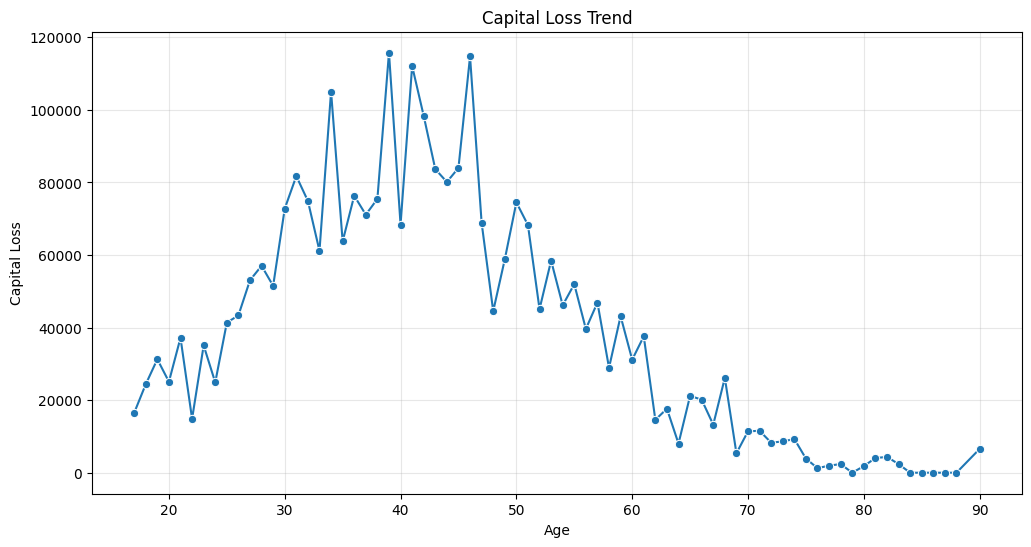

In [12]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='age', y='capital.loss', marker='o', estimator=sum, errorbar=None) # estimator=sum aggregates the data for us

plt.title('Capital Loss Trend')
plt.xlabel('Age')
plt.ylabel('Capital Loss')
plt.grid(alpha=0.3)
plt.show()

In [13]:
print("\nCategorical Statistics:")
display(df.describe(include=['O', 'category']))


Categorical Statistics:


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Univariate Analysis (Distributions)

In [14]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("scikit-learn/adult-census-income", split="train")

# Convert to Pandas DataFrame for easier manipulation
df = dataset.to_pandas()

# 2. Basic Inspection
print(f"Dataset Shape: {df.shape}")
print("-" * 30)
print("First 5 rows:")
display(df.head())


Dataset Shape: (32561, 15)
------------------------------
First 5 rows:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df.shape

(32561, 15)

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [19]:
df['income'].nunique()

2

In [20]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

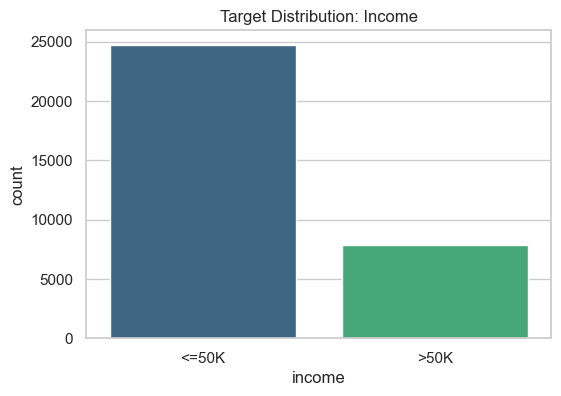

In [21]:
sns.set(style="whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df, hue="income", palette='viridis')
plt.title('Target Distribution: Income')
plt.show()

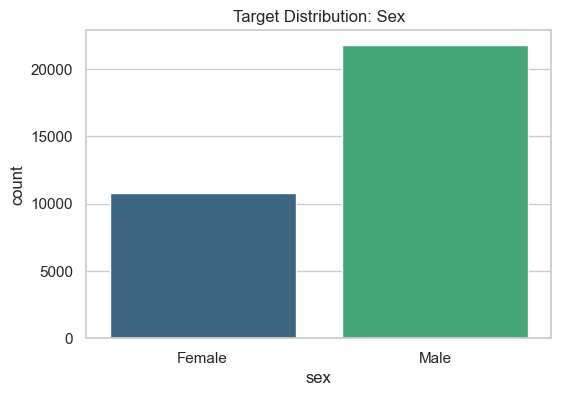

In [22]:
sns.set(style="whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, hue="sex", palette='viridis')
plt.title('Target Distribution: Sex')
plt.show()

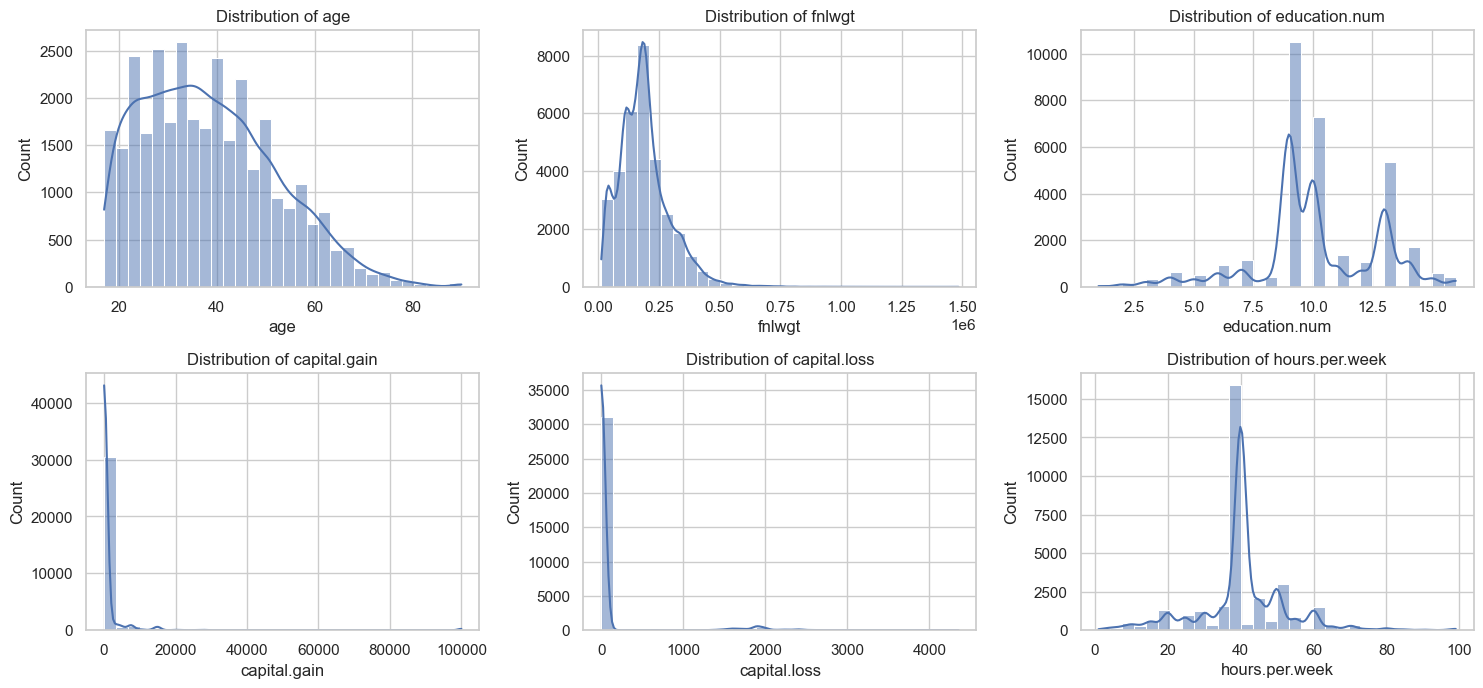

In [23]:
# 2. Numerical Distribution (Histograms)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

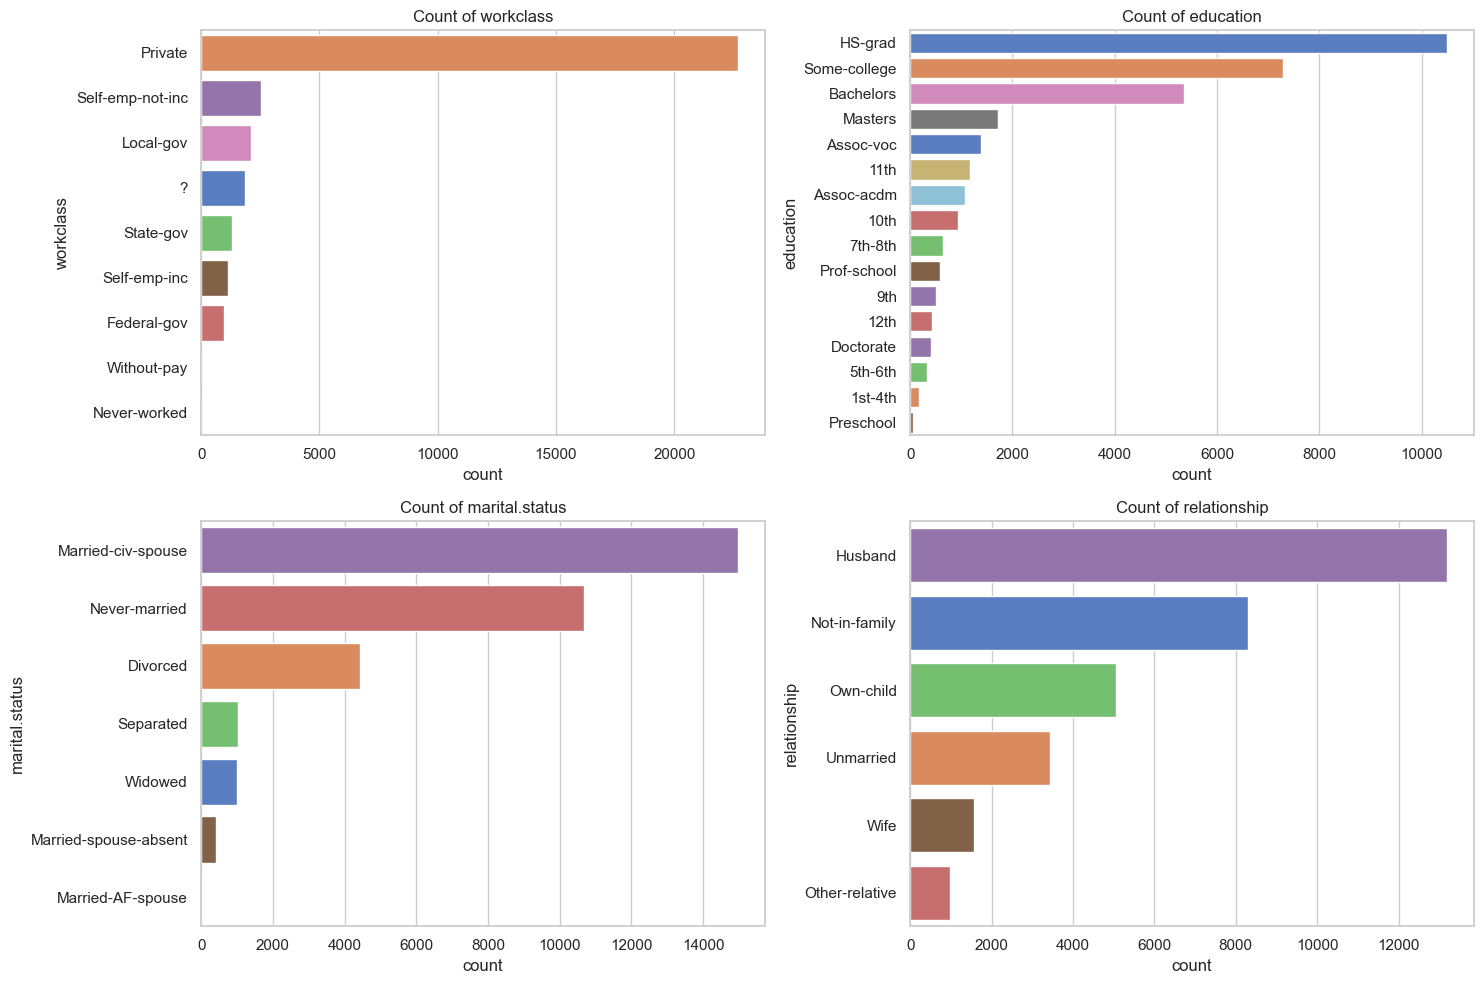

In [24]:
# 3. Categorical Distribution
cat_cols = ['workclass', 'education', 'marital.status', 'relationship']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=col, palette='muted')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## Handling Outliers - IQR Method

## Understanding IQR
** Outliers can skew statistical measures and ruin model performance (especially linear models).

** IQR: The difference between the 75th percentile (Q3) and the 25th percentile (Q1).

** Bounds: Lower = Q1 - 1.5IQR,
Upper = Q3 + 1.5IQR.

In [25]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print(Q1)
print(Q3)

28.0
48.0


In [26]:
Q1 = df['hours.per.week'].quantile(0.25)
Q3 = df['hours.per.week'].quantile(0.75)
Q2 = df['hours.per.week'].quantile(0.50)
print(Q1)
print(Q3)
print(Q2)

40.0
45.0
40.0


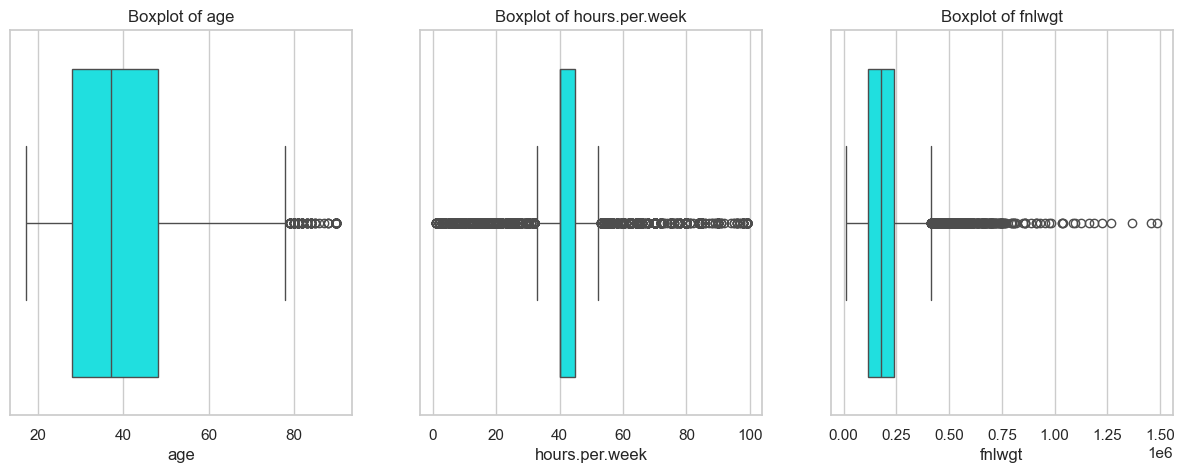

In [27]:
# Focus on numerical columns that looked skewed on Day 1
focus_cols = ['age', 'hours.per.week', 'fnlwgt']

plt.figure(figsize=(15, 5))
for i, col in enumerate(focus_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color='cyan')
    plt.title(f'Boxplot of {col}')
plt.show()

In [28]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    print(f"Column: {column} | IQR: {IQR} | Lower: {lower_bound} | Upper: {upper_bound}")
   
    # Let's check how many outliers we have
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers identified: {len(outliers)}")

   
    # Strategy: Capping (Winsorizing)
    # We cap values to the upper and lower bounds instead of deleting rows (to preserve data)
   
    df_clean = df.copy()
    df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound,
                                np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column]))
   
    return df_clean

Column: hours.per.week | IQR: 5.0 | Lower: 32.5 | Upper: 52.5
Number of outliers identified: 9008
Column: age | IQR: 20.0 | Lower: -2.0 | Upper: 78.0
Number of outliers identified: 143


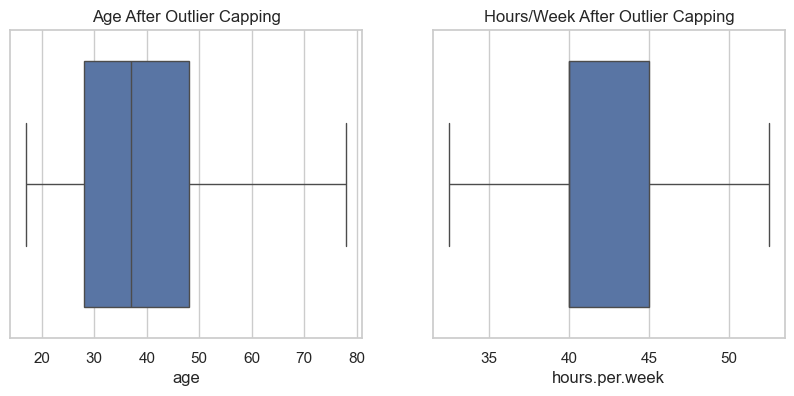

In [29]:
# Apply to specific columns
# Let's apply it to 'hours.per.week' and 'age'
df = handle_outliers_iqr(df, 'hours.per.week')
df = handle_outliers_iqr(df, 'age')

# Visualize After Capping
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Age After Outlier Capping')


plt.subplot(1, 2, 2)
sns.boxplot(x=df['hours.per.week'])
plt.title('Hours/Week After Outlier Capping')
plt.show()

In [ ]:
pip install sickit-learn

In [ ]:
!pip install scikit-learn

In [ ]:
python.exe -m pip install --upgrade pip

### Feature Scaling - Normalization & Standardization

# Feature Scaling / Normalization — Why It Matters

## Without Scaling
When features are on very different scales (e.g., age vs. income):

- ❌ **Slow or failed convergence**
- ❌ **Biased feature importance**
- ❌ **Poor model performance**


---

## With Scaling
After scaling features to a similar range:

- ✅ **Faster training**
- ✅ **Better accuracy**
- ✅ **More stable gradients**
- ✅ **Fair feature contribution**

**Why?**  
All features contribute more evenly, helping gradient-based optimizers move efficiently toward the optimum.

---

## Simple Intuition
> **Normalization = “Put everything between 0 and 1”**

This prevents one feature from overpowering the others just because of its units.

---

## Common Scaling Methods

### 1. Min–Max Normalization
Scales values to \([0, 1]\)

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Best when:
- You want a fixed range
- No extreme outliers

---

Best when:
- Data is roughly normal
- Using models like Logistic Regression, SVM, Linear Regression

---

**Normalization (Min-Max Scaling)**: Scales data between 0 and 1. Good when data doesn't follow a Gaussian distribution.

**Standardization (Z-Score Scaling)**: Scales data to have Mean=0 and Std Dev=1. Good when data follows a Gaussian distribution
or when algorithms assume it (Logistic Regression, SVM).

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Isolate numerical columns to scale
cols_to_scale = ['age', 'fnlwgt', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']

# 1. Standardization (Preferred for this dataset which has outliers/variance)
scaler_std = StandardScaler()

# Create a copy to keep original for comparison
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler_std.fit_transform(df[cols_to_scale])

In [31]:
df_scaled

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,2.909754,?,-1.067997,HS-grad,-0.420060,Widowed,?,Not-in-family,White,Female,-0.14592,10.593507,-0.194354,United-States,<=50K
1,2.909754,Private,-0.539169,HS-grad,-0.420060,Widowed,Exec-managerial,Not-in-family,White,Female,-0.14592,10.593507,-1.406591,United-States,<=50K
2,2.024532,?,-0.035220,Some-college,-0.031360,Widowed,?,Unmarried,Black,Female,-0.14592,10.593507,-0.194354,United-States,<=50K
3,1.139310,Private,-0.468215,7th-8th,-2.363558,Divorced,Machine-op-inspct,Unmarried,White,Female,-0.14592,9.461864,-0.194354,United-States,<=50K
4,0.180319,Private,0.709482,Some-college,-0.031360,Separated,Prof-specialty,Own-child,White,Female,-0.14592,9.461864,-0.194354,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,Private,1.140460,Some-college,-0.031360,Never-married,Protective-serv,Not-in-family,White,Male,-0.14592,-0.216660,-0.194354,United-States,<=50K
32557,-0.852440,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.14592,-0.216660,-0.517617,United-States,<=50K
32558,0.106551,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.14592,-0.216660,-0.194354,United-States,>50K
32559,1.434384,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.14592,-0.216660,-0.194354,United-States,<=50K


In [32]:
# 2. Check the effect
print("Original Mean (Age):", df['age'].mean())
print("Scaled Mean (Age):", round(df_scaled['age'].mean(), 2)) # Should be 0
print("Scaled Std (Age):", round(df_scaled['age'].std(), 2))   # Should be 1

Original Mean (Age): 38.55560332913608
Scaled Mean (Age): -0.0
Scaled Std (Age): 1.0


In [33]:
print("Original Mean (capital.gain):", df['capital.gain'].mean())
print("Scaled Mean (capital.gain):", round(df_scaled['capital.gain'].mean(), 2)) # Should be 0
print("Scaled Std (capital.gain):", round(df_scaled['capital.gain'].std(), 2))   # Should be 1

Original Mean (capital.gain): 1077.6488437087312
Scaled Mean (capital.gain): 0.0
Scaled Std (capital.gain): 1.0


In [34]:
print("Original Mean (capital.loss):", df['capital.loss'].mean())
print("Scaled Mean (capital.loss):", round(df_scaled['capital.loss'].mean(), 2)) # Should be 0
print("Scaled Std (capital.loss):", round(df_scaled['capital.loss'].std(), 2))   # Should be 1

Original Mean (capital.loss): 87.303829734959
Scaled Mean (capital.loss): -0.0
Scaled Std (capital.loss): 1.0


In [35]:
print("Original Mean (fnlwgt):", df['fnlwgt'].mean())
print("Scaled Mean (fnlwgt):", round(df_scaled['fnlwgt'].mean(), 2)) # Should be 0
print("Scaled Std (fnlwgt):", round(df_scaled['fnlwgt'].std(), 2))   # Should be 1

Original Mean (fnlwgt): 189778.36651208502
Scaled Mean (fnlwgt): -0.0
Scaled Std (fnlwgt): 1.0


In [36]:
print("Original Mean (hours.per.week):", df['hours.per.week'].mean())
print("Scaled Mean (hours.per.week):", round(df_scaled['hours.per.week'].mean(), 2)) # Should be 0
print("Scaled Std (hours.per.week):", round(df_scaled['hours.per.week'].std(), 2))   # Should be 1

Original Mean (hours.per.week): 41.20245078468106
Scaled Mean (hours.per.week): -0.0
Scaled Std (hours.per.week): 1.0


In [37]:
print("Original Mean (education.num):", df['education.num'].mean())
print("Scaled Mean (education.num):", round(df_scaled['education.num'].mean(), 2)) # Should be 0
print("Scaled Std (education.num):", round(df_scaled['education.num'].std(), 2))   # Should be 1

Original Mean (education.num): 10.0806793403151
Scaled Mean (education.num): 0.0
Scaled Std (education.num): 1.0


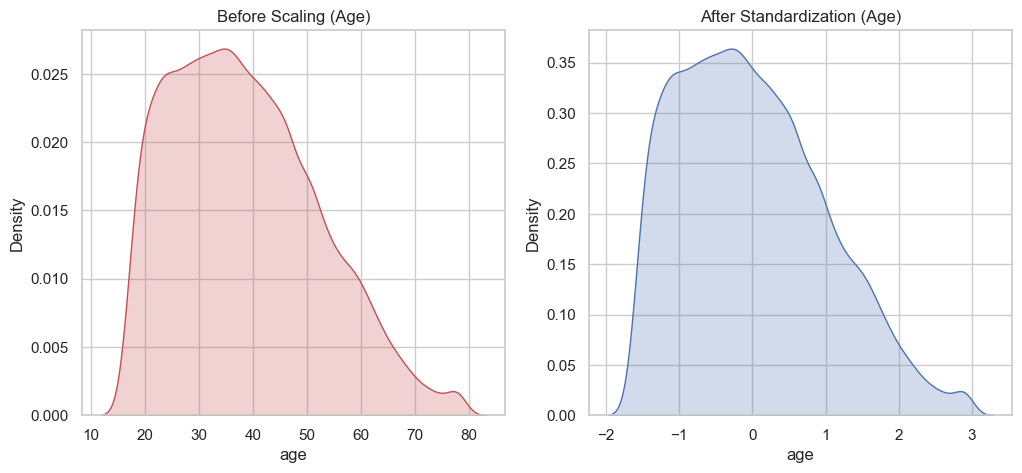

In [38]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['age'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (Age)')

# After
sns.kdeplot(df_scaled['age'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (Age)')
plt.show()

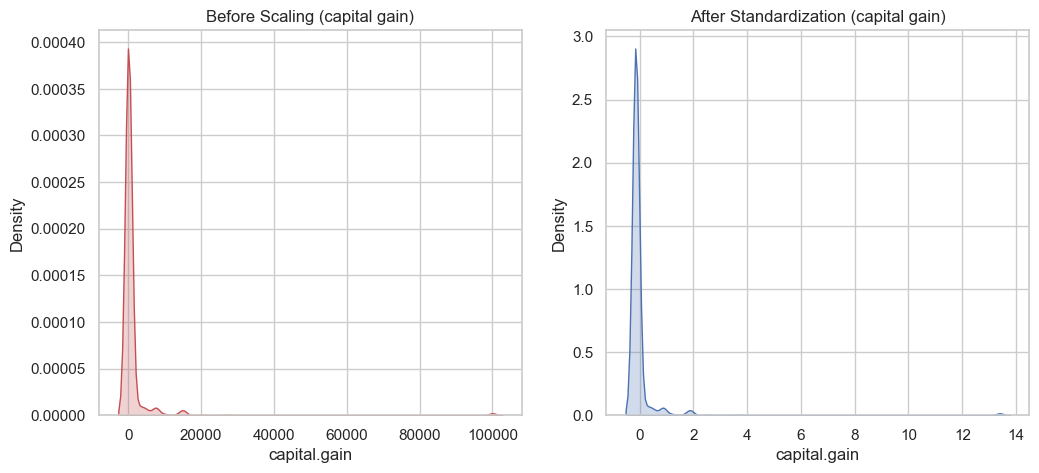

In [39]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['capital.gain'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (capital gain)')

# After
sns.kdeplot(df_scaled['capital.gain'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (capital gain)')
plt.show()

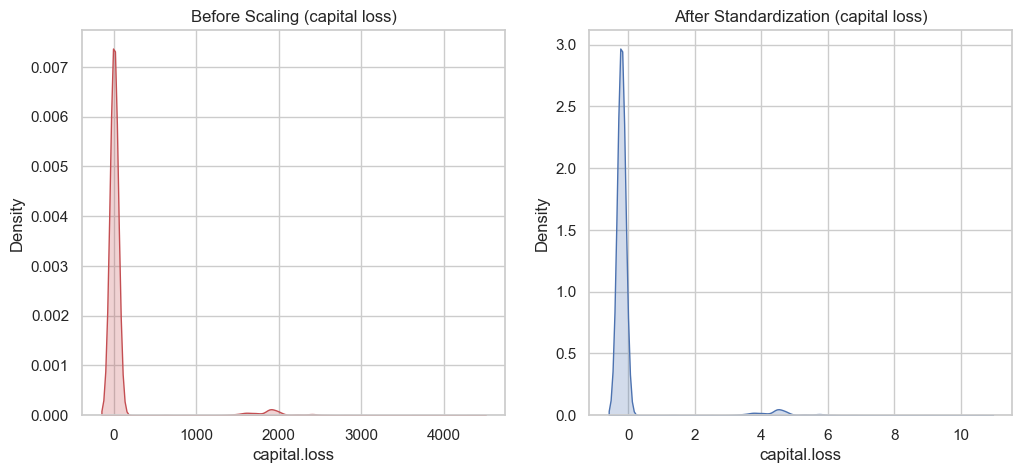

In [40]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['capital.loss'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (capital loss)')

# After
sns.kdeplot(df_scaled['capital.loss'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (capital loss)')
plt.show()

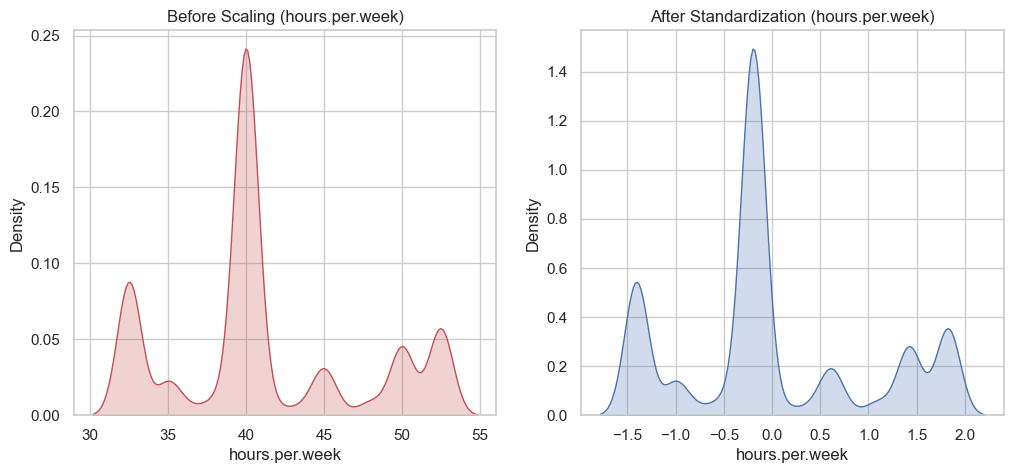

In [41]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['hours.per.week'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (hours.per.week)')

# After
sns.kdeplot(df_scaled['hours.per.week'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (hours.per.week)')
plt.show()

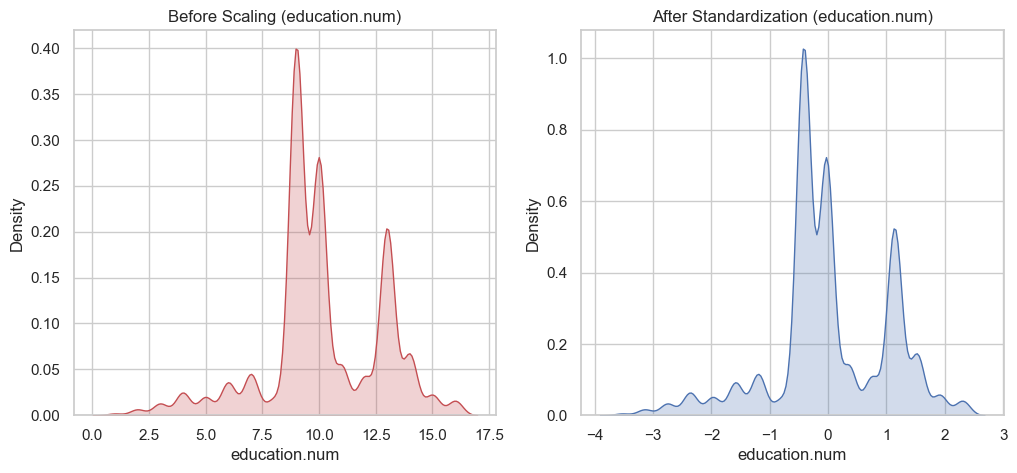

In [42]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['education.num'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (education.num)')

# After
sns.kdeplot(df_scaled['education.num'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (education.num)')
plt.show()

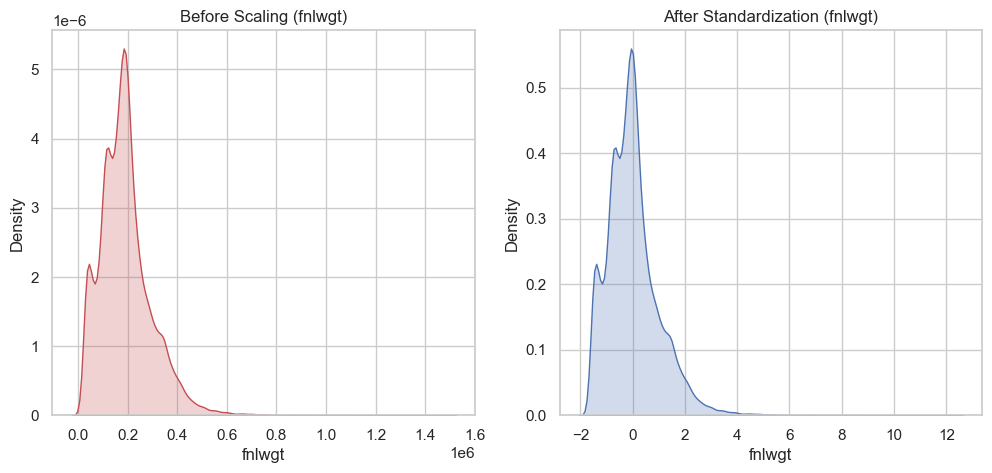

In [43]:
# 3. Visualization: Before vs After
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before
sns.kdeplot(df['fnlwgt'], ax=ax1, fill=True, color='r')
ax1.set_title('Before Scaling (fnlwgt)')

# After
sns.kdeplot(df_scaled['fnlwgt'], ax=ax2, fill=True, color='b')
ax2.set_title('After Standardization (fnlwgt)')
plt.show()

## 1️⃣ Nominal Data (Name only)

### What it is:
- Categories with **no natural order or ranking**
- Numbers (if used) are just **labels**, not values
- You **cannot** say one category is greater than another

### Examples:
- Gender: Male, Female  
- Color: Red, Blue, Green  
- Country: India, USA, UK  
- Marital Status: Single, Married  

### Key point:
- **Order does not matter**

### Common encoding:
✔ **One-Hot Encoding**

---

## 2️⃣ Ordinal Data (Ordered categories)

### What it is:
- Categories with a **meaningful order**
- **Unequal or unknown spacing** between levels
- You know the ranking
- You don’t know the exact difference between ranks

### Examples:
- Education level: High School < Bachelor < Master < PhD  
- Satisfaction: Low < Medium < High  
- Movie ratings: Poor < Average < Good < Excellent  

### Key point:
- **Order matters, but differences are not measurable**

### Common encoding:
✔ **Label Encoding** (or custom mapping)

---

## 3️⃣ Discrete Data (Countable numbers)

### What it is:
Numerical values that:
- Are **countable**
- Take **separate, distinct values**
- Are usually **whole numbers**

### Examples:
- Number of children: 0, 1, 2, 3  
- Number of cars owned  
- Number of students in a class  
- Dice outcomes: 1–6  

### Key point:
- **You can count them; no fractions in between**

---

## 4️⃣ Continuous Data (Measurable quantities)

### What it is:
Numerical values that:
- Can take **any value within a range**
- Include **decimals and fractions**

### Examples:
- Height: 170.5 cm  
- Weight: 65.2 kg  
- Temperature: 36.6 °C  
- Salary, Time, Distance  

### Key point:
- **Infinite possible values within a range**

## Encoding Strategies

### 🔢 Label Encoding
- Assigns a **unique integer** to each category  
- Best used for **ordinal data**, where order or rank matters  
  - Examples: `Low < Medium < High`, `Poor < Average < Good`
- Also commonly used for the **target (label) variable**

**Example:**
- Low → 0  
- Medium → 1  
- High → 2  

---

### 🧩 One-Hot Encoding
- Creates **separate binary (0/1) columns** for each category  
- Best used for **nominal data**, where no natural order exists  
  - Examples: `Red`, `Blue`, `Green`
- Prevents models from assuming a false ranking between categories

**Example:**
| Color | Red | Blue | Green |
|------|-----|------|-------|
| Red  | 1   | 0    | 0     |
| Blue | 0   | 1    | 0     |
| Green| 0   | 0    | 1     |

In [44]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding the Target Variable
le = LabelEncoder()
df['income_encoded'] = le.fit_transform(df['income'])

print("Target Encoding Mapping:")
for i, item in enumerate(le.classes_):
    print(f"{item} --> {i}")

# Drop original income column
df.drop('income', axis=1, inplace=True)

Target Encoding Mapping:
<=50K --> 0
>50K --> 1


In [45]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_encoded
0,78.0,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,0
1,78.0,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States,0
2,66.0,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,0
3,54.0,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,0
4,41.0,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40.0,United-States,0
32557,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,0
32558,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,1
32559,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,0


In [112]:
# 2. One-Hot Encoding for Nominal Features
# Nominal: Workclass, Marital Status, Occupation, Relationship, Race, Sex
nominal_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']

# Using Pandas get_dummies (easiest for EDA phase)
df_encoded = pd.get_dummies(df_scaled, columns=nominal_cols, drop_first=True)

print(f"Shape after One-Hot Encoding: {df_encoded.shape}")


Shape after One-Hot Encoding: (32561, 47)


In [113]:
# 1. Label Encoding the Target Variable
le = LabelEncoder()
df_encoded['income_encoded'] = le.fit_transform(df_encoded['income'])

print("Target Encoding Mapping:")
for i, item in enumerate(le.classes_):
    print(f"{item} --> {i}")

# Drop original income column
df_encoded.drop('income', axis=1, inplace=True)

Target Encoding Mapping:
<=50K --> 0
>50K --> 1


In [114]:
df.shape

(32561, 46)

In [115]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_built_with_meson',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_pandas_datetime_CAPI',
 '_pandas_parser_CAPI',
 '_testing',
 '_typing',
 '_version_meson',
 'annota

In [116]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,net_capital
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,-10.739427
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,-10.739427
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,<=50K,False,False,False,...,False,False,True,False,False,True,False,False,False,-10.739427
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,<=50K,False,False,False,...,False,False,True,False,False,False,False,True,False,-9.607784
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,<=50K,False,False,False,...,False,True,False,False,False,False,False,True,False,-9.607784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,True,0.070739
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,<=50K,False,False,False,...,False,False,False,True,False,False,False,True,False,0.070739
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,>50K,False,False,False,...,False,False,False,False,False,False,False,True,True,0.070739
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,<=50K,False,False,False,...,False,False,True,False,False,False,False,True,False,0.070739


In [117]:
df_encoded

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,native.country,workclass_Federal-gov,workclass_Local-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,HS-grad,-0.420060,-0.14592,10.593507,-0.194354,United-States,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,HS-grad,-0.420060,-0.14592,10.593507,-1.406591,United-States,False,False,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,Some-college,-0.031360,-0.14592,10.593507,-0.194354,United-States,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,7th-8th,-2.363558,-0.14592,9.461864,-0.194354,United-States,False,False,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,Some-college,-0.031360,-0.14592,9.461864,-0.194354,United-States,False,False,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,Some-college,-0.031360,-0.14592,-0.216660,-0.194354,United-States,False,False,...,False,False,False,False,False,False,False,True,True,0
32557,-0.852440,0.639741,Assoc-acdm,0.746039,-0.14592,-0.216660,-0.517617,United-States,False,False,...,False,False,False,True,False,False,False,True,False,0
32558,0.106551,-0.335433,HS-grad,-0.420060,-0.14592,-0.216660,-0.194354,United-States,False,False,...,False,False,False,False,False,False,False,True,True,1
32559,1.434384,-0.358777,HS-grad,-0.420060,-0.14592,-0.216660,-0.194354,United-States,False,False,...,False,False,True,False,False,False,False,True,False,0


In [118]:
df_encoded.columns

Index(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occup

In [119]:
df.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
   

In [120]:
df_encoded.drop(columns=['education'],inplace= True)

In [121]:
df_encoded

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,native.country,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,United-States,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,United-States,False,False,False,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,United-States,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,United-States,False,False,False,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,United-States,False,False,False,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,United-States,False,False,False,...,False,False,False,False,False,False,False,True,True,0
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,United-States,False,False,False,...,False,False,False,True,False,False,False,True,False,0
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,United-States,False,False,False,...,False,False,False,False,False,False,False,True,True,1
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,United-States,False,False,False,...,False,False,True,False,False,False,False,True,False,0


In [122]:
df_encoded.drop(columns=['native.country'],inplace= True)
df_encoded

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,0
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,1
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0


## Feature Engineering & Selection

### 🔧 Feature Engineering
- **Definition:** Creating new columns or features from existing data to better represent the underlying problem.
- **Purpose:** Helps models capture important patterns and relationships that may not be obvious in the raw data.
- **Example:**  
  ```text
  Net Capital = capital.gain - capital.loss

In [123]:
df_encoded['capital.gain'] = (
    df_encoded['capital.gain']
      .replace('?', np.nan)
      .ffill()
)

df_encoded['capital.loss'] = (
    df_encoded['capital.loss']
      .replace('?', np.nan)
      .ffill()
)

In [124]:
df_encoded.isnull().sum()

age                                     0
fnlwgt                                  0
education.num                           0
capital.gain                            0
capital.loss                            0
hours.per.week                          0
workclass_Federal-gov                   0
workclass_Local-gov                     0
workclass_Never-worked                  0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
marital.status_Married-AF-spouse        0
marital.status_Married-civ-spouse       0
marital.status_Married-spouse-absent    0
marital.status_Never-married            0
marital.status_Separated                0
marital.status_Widowed                  0
occupation_Adm-clerical                 0
occupation_Armed-Forces                 0
occupation_Craft-repair                 0
occupation_Exec-managerial        

In [125]:
# 3. Label Encoding for Ordinal Features?
if 'education' in df_encoded.columns:
    df_encoded.drop('education', axis=1, inplace=True)

# Update main dataframe
df = df_encoded
display(df.head())


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,True,False,False,False,False,False,True,False,0


In [126]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,0
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,1
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32561 non-null  float64
 1   fnlwgt                                32561 non-null  float64
 2   education.num                         32561 non-null  float64
 3   capital.gain                          32561 non-null  float64
 4   capital.loss                          32561 non-null  float64
 5   hours.per.week                        32561 non-null  float64
 6   workclass_Federal-gov                 32561 non-null  bool   
 7   workclass_Local-gov                   32561 non-null  bool   
 8   workclass_Never-worked                32561 non-null  bool   
 9   workclass_Private                     32561 non-null  bool   
 10  workclass_Self-emp-inc                32561 non-null  bool   
 11  workclass_Self-

In [128]:
print(df)

            age    fnlwgt  education.num  capital.gain  capital.loss  \
0      2.909754 -1.067997      -0.420060      -0.14592     10.593507   
1      2.909754 -0.539169      -0.420060      -0.14592     10.593507   
2      2.024532 -0.035220      -0.031360      -0.14592     10.593507   
3      1.139310 -0.468215      -2.363558      -0.14592      9.461864   
4      0.180319  0.709482      -0.031360      -0.14592      9.461864   
...         ...       ...            ...           ...           ...   
32556 -1.221282  1.140460      -0.031360      -0.14592     -0.216660   
32557 -0.852440  0.639741       0.746039      -0.14592     -0.216660   
32558  0.106551 -0.335433      -0.420060      -0.14592     -0.216660   
32559  1.434384 -0.358777      -0.420060      -0.14592     -0.216660   
32560 -1.221282  0.110960      -0.420060      -0.14592     -0.216660   

       hours.per.week  workclass_Federal-gov  workclass_Local-gov  \
0           -0.194354                  False                False 

In [129]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,False,False,False,True,...,False,False,False,False,False,False,False,True,False,0
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,0
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,False,False,False,True,...,False,False,False,True,False,False,False,True,False,0
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,False,True,True,1
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,True,False,False,False,False,True,False,0


In [130]:
df['net_capital'] = df['capital.gain'] - df['capital.loss']

In [131]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_encoded,net_capital
0,2.909754,-1.067997,-0.420060,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,False,False,False,False,False,True,False,0,-10.739427
1,2.909754,-0.539169,-0.420060,-0.14592,10.593507,-1.406591,False,False,False,True,...,False,False,False,False,False,False,True,False,0,-10.739427
2,2.024532,-0.035220,-0.031360,-0.14592,10.593507,-0.194354,False,False,False,False,...,False,True,False,False,True,False,False,False,0,-10.739427
3,1.139310,-0.468215,-2.363558,-0.14592,9.461864,-0.194354,False,False,False,True,...,False,True,False,False,False,False,True,False,0,-9.607784
4,0.180319,0.709482,-0.031360,-0.14592,9.461864,-0.194354,False,False,False,True,...,True,False,False,False,False,False,True,False,0,-9.607784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.221282,1.140460,-0.031360,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,True,True,0,0.070739
32557,-0.852440,0.639741,0.746039,-0.14592,-0.216660,-0.517617,False,False,False,True,...,False,False,True,False,False,False,True,False,0,0.070739
32558,0.106551,-0.335433,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,False,False,False,False,False,True,True,1,0.070739
32559,1.434384,-0.358777,-0.420060,-0.14592,-0.216660,-0.194354,False,False,False,True,...,False,True,False,False,False,False,True,False,0,0.070739


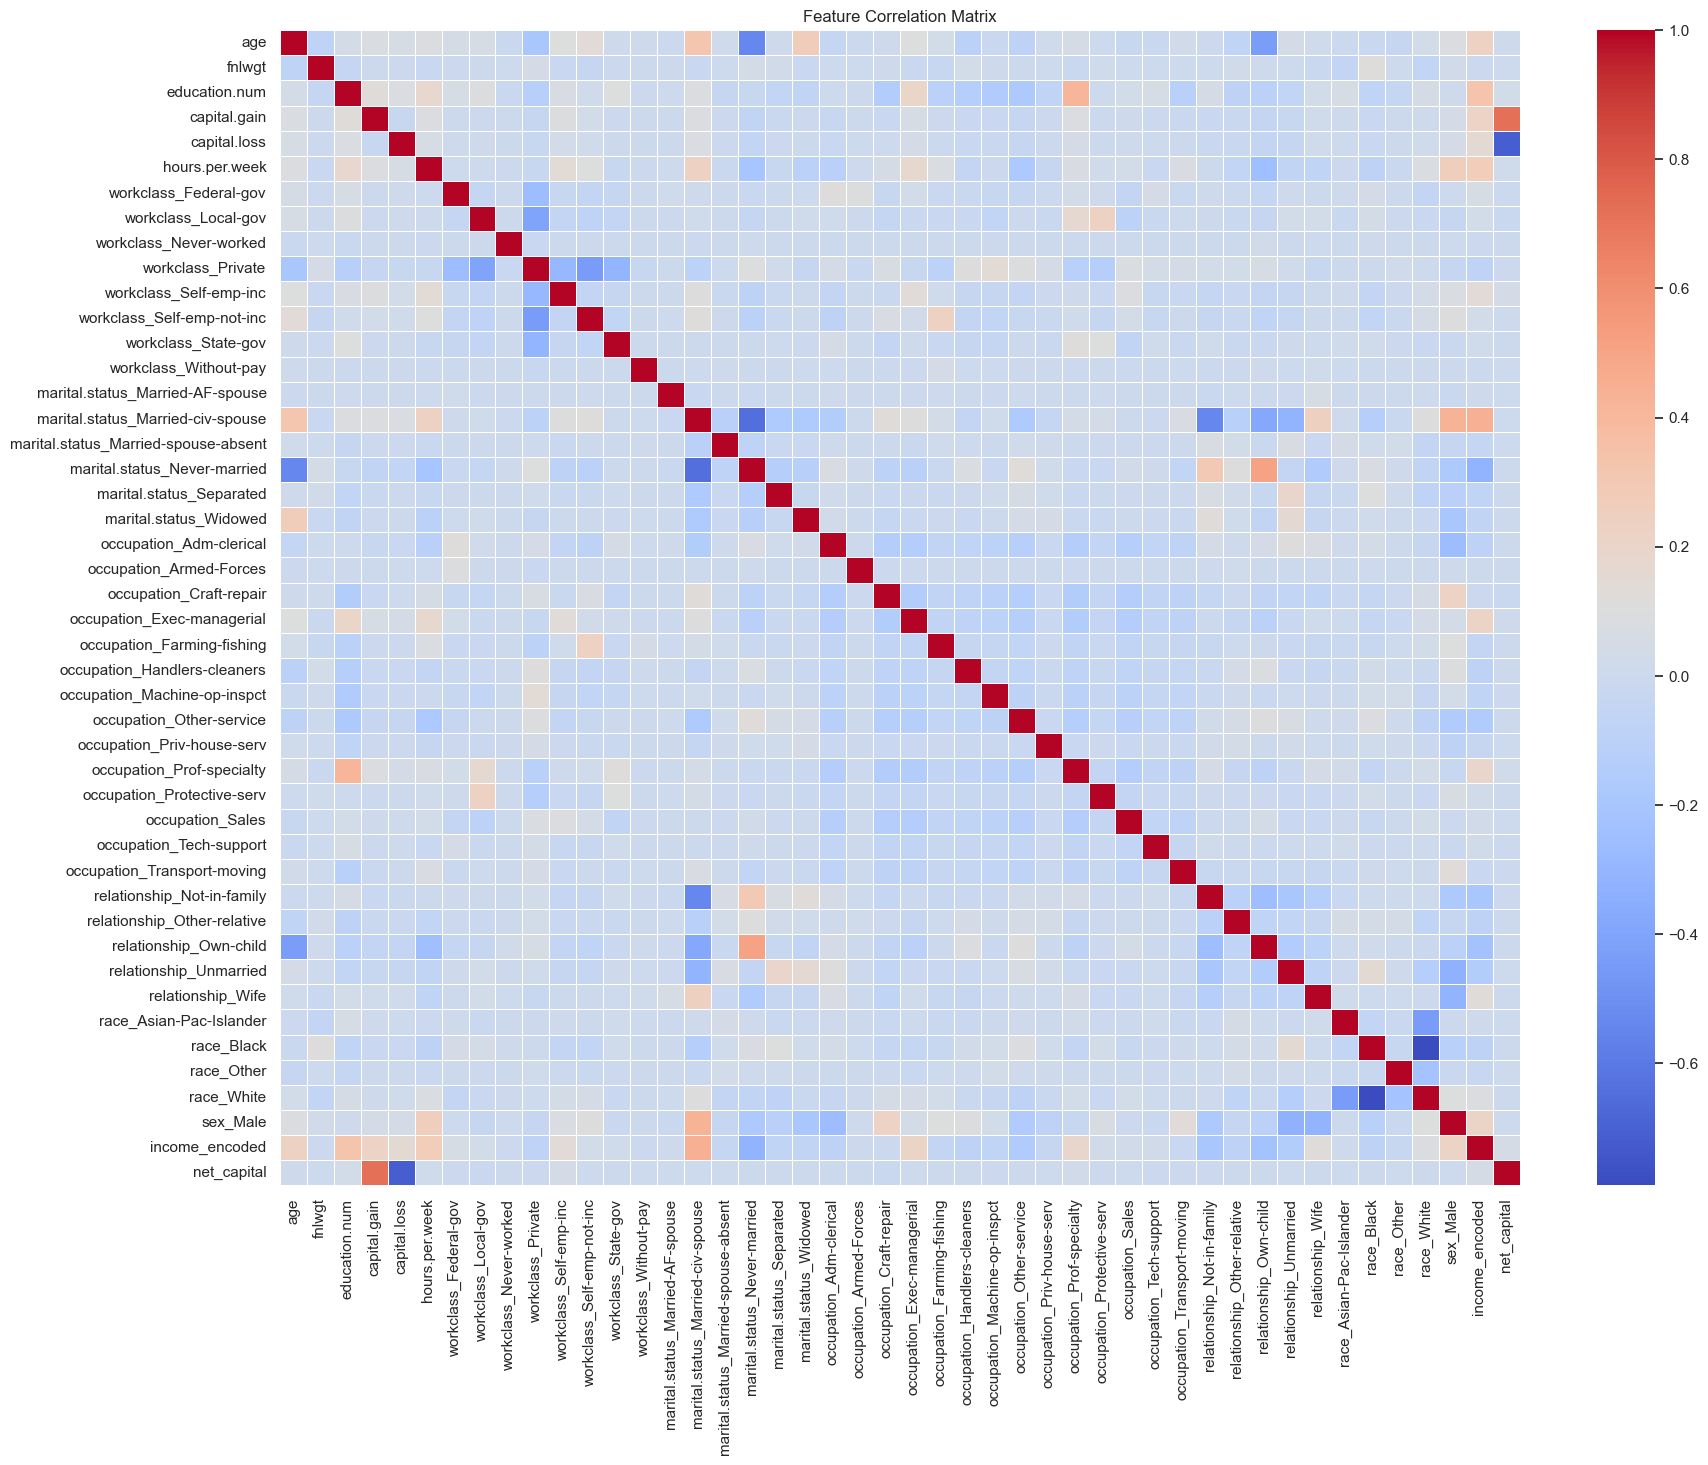

In [132]:
# 2. Check Correlation
plt.figure(figsize=(20, 15))
# Calculate correlation only on numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [134]:
corr_matrix.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relat

In [135]:
# 3. Feature Selection based on Correlation with Target
target_corr = corr_matrix['income_encoded'].sort_values(ascending=False)
print("\nTop 10 features correlated with Income (>50K):")
print(target_corr.head(10))


Top 10 features correlated with Income (>50K):
income_encoded                       1.000000
marital.status_Married-civ-spouse    0.444696
education.num                        0.335154
hours.per.week                       0.271055
age                                  0.235865
capital.gain                         0.223329
sex_Male                             0.215980
occupation_Exec-managerial           0.214861
occupation_Prof-specialty            0.185866
capital.loss                         0.150526
Name: income_encoded, dtype: float64


In [136]:
# Drop columns with extremely low correlation (optional noise reduction)
# keeping features with abs(correlation) > 0.01
relevant_features = target_corr[abs(target_corr) > 0.01].index.tolist()
df_final = df[relevant_features]
print(f"\nReduced feature set from {df.shape[1]} to {df_final.shape[1]}")


Reduced feature set from 46 to 43


In [137]:
from sklearn.model_selection import train_test_split

# 1. Separate Features (X) and Target (y)
X = df_final.drop('income_encoded', axis=1)
y = df_final['income_encoded']

# 2. Split
# stratify=y ensures the proportion of >50k and <=50k is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Splitting Complete:")
print(f"Training Set: {X_train.shape}")
print(f"Test Set: {X_test.shape}")

# 3. Save processed data (Optional)
# X_train.to_csv('X_train_processed.csv', index=False)

Data Splitting Complete:
Training Set: (26048, 42)
Test Set: (6513, 42)


In [141]:
from sklearn.model_selection import train_test_split

X = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
y = [0, 0, 1, 1, 1, 1, 0, 1, 1,0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , random_state=42, stratify=y
)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train: [[4], [10], [2], [6], [9], [8], [3], [1]]
X_test: [[7], [5]]
y_train: [1, 0, 0, 1, 1, 1, 1, 0]
y_test: [0, 1]
